# 1-Data Pre-processing 

In [73]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


In [74]:
# Importing data
df = pd.read_csv("/content/train.csv")
test = pd.read_csv('/content/test.csv')

df.shape

(17996, 17)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

### Change column values

In [76]:
# Filter all the rows that have duration value less than "30"
df.loc[(df['duration_in min/ms'] < 30)]['duration_in min/ms']

7        3.105783
10       4.330450
13       4.440250
25       4.015633
34       3.503783
           ...   
17952    5.407783
17959    3.686017
17974    3.408667
17986    4.392883
17988    3.787783
Name: duration_in min/ms, Length: 2580, dtype: float64

In [77]:
condition = df['duration_in min/ms'] < 30 

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in min/ms'] = df.loc[condition,'duration_in min/ms']*60000

In [78]:
df.rename(columns={"duration_in min/ms": "duration_in_ms"}, inplace=True)

In [79]:
#df.drop('index', axis=1, inplace=True)

## Checking for duplicates

In [80]:
df.duplicated().sum()

3

In [81]:
df = df.drop_duplicates()
df.shape

(17993, 17)

## Columns with NaN values
- Popularity
- key                 
- instrumentalness

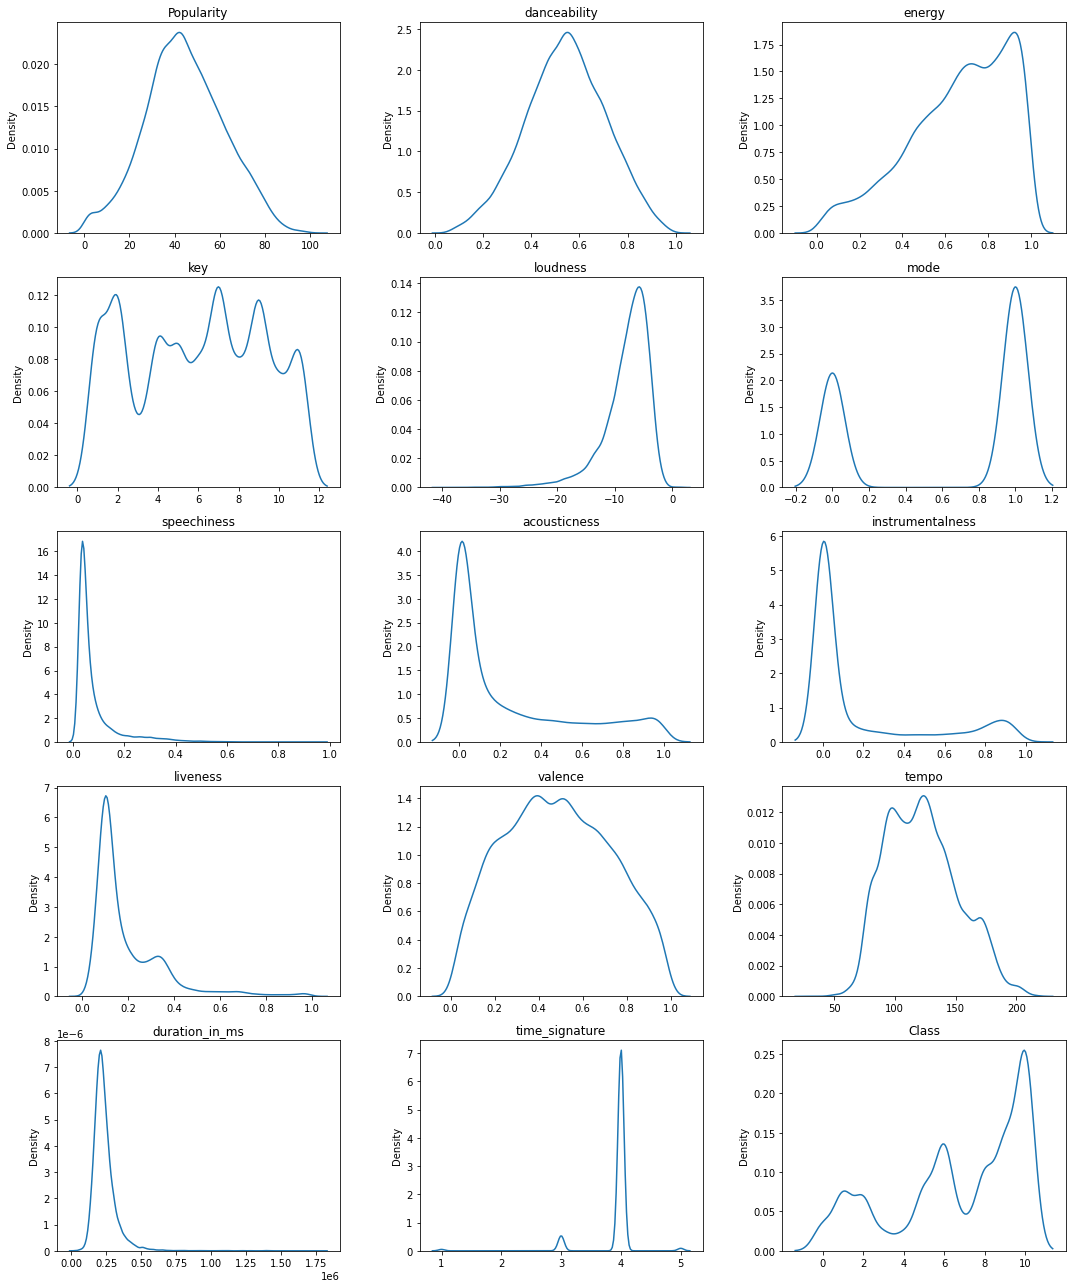

In [82]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.kdeplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

### Imputing NaN values
- Popularity and Key is normally distributed, so we'll use the mean to fill NA values. 
- instrumentalness seems to be positively skewed, so the median would be a good option to fill NA values

In [83]:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True)
df['key'].fillna(df['key'].mean(), inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].median(), inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17993 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       17993 non-null  object 
 1   Track Name        17993 non-null  object 
 2   Popularity        17993 non-null  float64
 3   danceability      17993 non-null  float64
 4   energy            17993 non-null  float64
 5   key               17993 non-null  float64
 6   loudness          17993 non-null  float64
 7   mode              17993 non-null  int64  
 8   speechiness       17993 non-null  float64
 9   acousticness      17993 non-null  float64
 10  instrumentalness  17993 non-null  float64
 11  liveness          17993 non-null  float64
 12  valence           17993 non-null  float64
 13  tempo             17993 non-null  float64
 14  duration_in_ms    17993 non-null  float64
 15  time_signature    17993 non-null  int64  
 16  Class             17993 non-null  int64 

In [85]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,Class
count,17993.000000,17993.000000,17993.000000,17993.000000,17993.000000,17993.000000,17993.000000,17993.00000,17993.000000,17993.000000,17993.000000,17993.000000,1.799300e+04,17993.000000,17993.000000
mean,44.508511,0.543444,0.662765,5.952625,-7.910629,0.636692,0.079706,0.24708,0.135348,0.196119,0.486172,122.622402,2.358326e+05,3.924026,6.695326
std,17.216948,0.166279,0.235390,3.012822,4.049361,0.480966,0.083580,0.31065,0.274809,0.159170,0.240190,29.572273,8.567863e+04,0.361647,3.206105
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.00000,0.000001,0.011900,0.018300,30.557000,2.332000e+04,1.000000,0.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.00430,0.000294,0.097500,0.297000,99.622000,1.876670e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,5.952625,-7.016000,1.000000,0.047400,0.08140,0.003910,0.129000,0.480000,120.065000,2.200000e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.43400,0.056600,0.258000,0.672000,141.969000,2.630890e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.99600,0.996000,1.000000,0.986000,217.416000,1.793160e+06,5.000000,10.000000


## Transformation

NameError: ignored

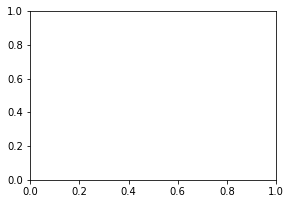

In [86]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        stats.probplot(df_dist[columns], dist='norm', plot=plt)
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

In [87]:
df_skew = df.select_dtypes([int,float])

for i in df_skew.columns:
  print(f'{i} =',df_skew[i].skew())

Popularity = 0.07669558518544822
danceability = -0.08369345304304482
energy = -0.6610150352462746
key = -0.05850647363717779
loudness = -1.7614193691127105
mode = -0.5684696527675345
speechiness = 3.0880448562768334
acousticness = 1.105517996081122
instrumentalness = 1.9725302906570672
liveness = 2.177417778948198
valence = 0.0900847395181493
tempo = 0.37973839001127835
duration_in_ms = 4.028792955829684
time_signature = -4.18230862524085
Class = -0.6664557863042111


### Features with high skewness and are not normally distributed(Data points going beyond the line):
- loudness
- speechiness 
- acousticness 
- instrumentalness 
- liveness 
- duration_in_ms 
#### Note: A skewness value greater than 1 or less than -1 indicates a highly skewed distribution



In [88]:
df["loudness"] = np.cbrt(df["loudness"]) 
df["speechiness"] = np.sqrt(df["speechiness"])
df["acousticness"] = np.sqrt(df["acousticness"])
df["instrumentalness"] = np.log(df["instrumentalness"]) 
df["liveness"] = np.log(df["liveness"]) 
df["duration_in_ms"] = np.log(df["duration_in_ms"])

## Distribution of features after transformation 

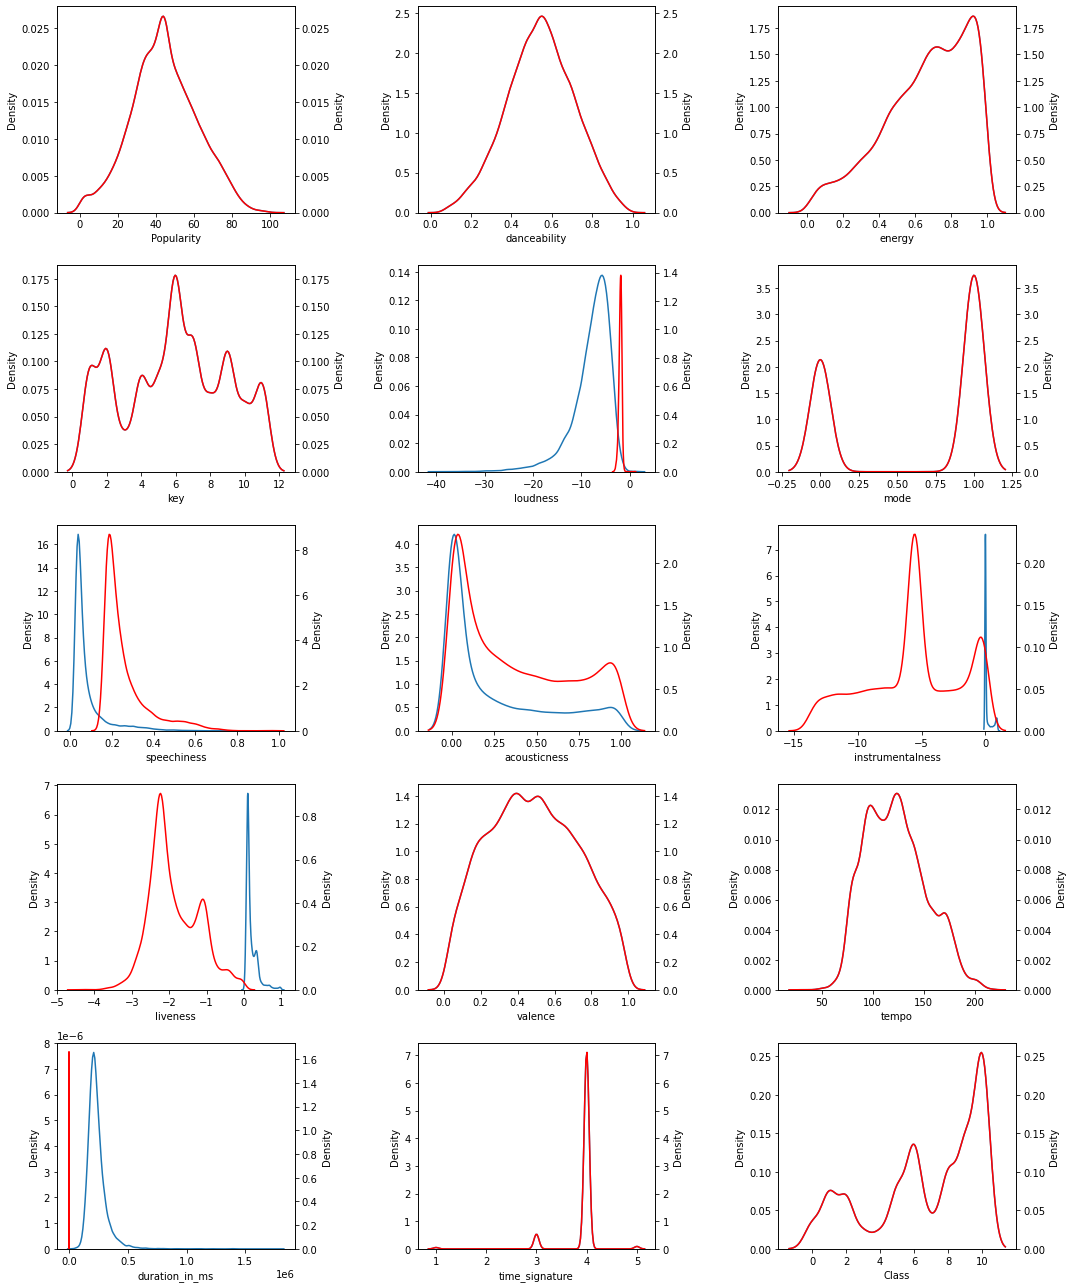

In [89]:
df_dist_t = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax1 = plt.subplot(5,3,i) 
        ax1 = sns.kdeplot(x=df_dist[columns])
        ax2 = ax1.twinx()
        ax2 = sns.kdeplot(x=df_dist_t[columns], color='red')
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

### QQ plot after transformation 

NameError: ignored

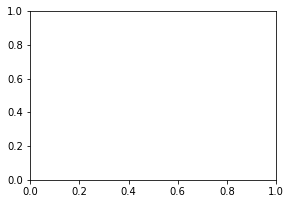

In [90]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        stats.probplot(df_dist[columns], dist='norm', plot=plt)
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

In [91]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-1.705862,1,0.220227,0.130767,-5.544218,-2.466281,0.8990,134.071,12.365620,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-1.933657,1,0.201494,0.033166,-5.518964,-2.292635,0.5690,116.454,12.436124,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-2.027455,1,0.229129,0.697137,-8.537396,-0.931404,0.7870,147.681,11.605204,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-1.868931,0,0.235584,0.145602,-5.544218,-2.103734,0.5690,107.033,12.066627,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-1.623482,1,0.464758,0.013000,-4.128936,-1.760261,0.0918,199.060,12.345661,4,10


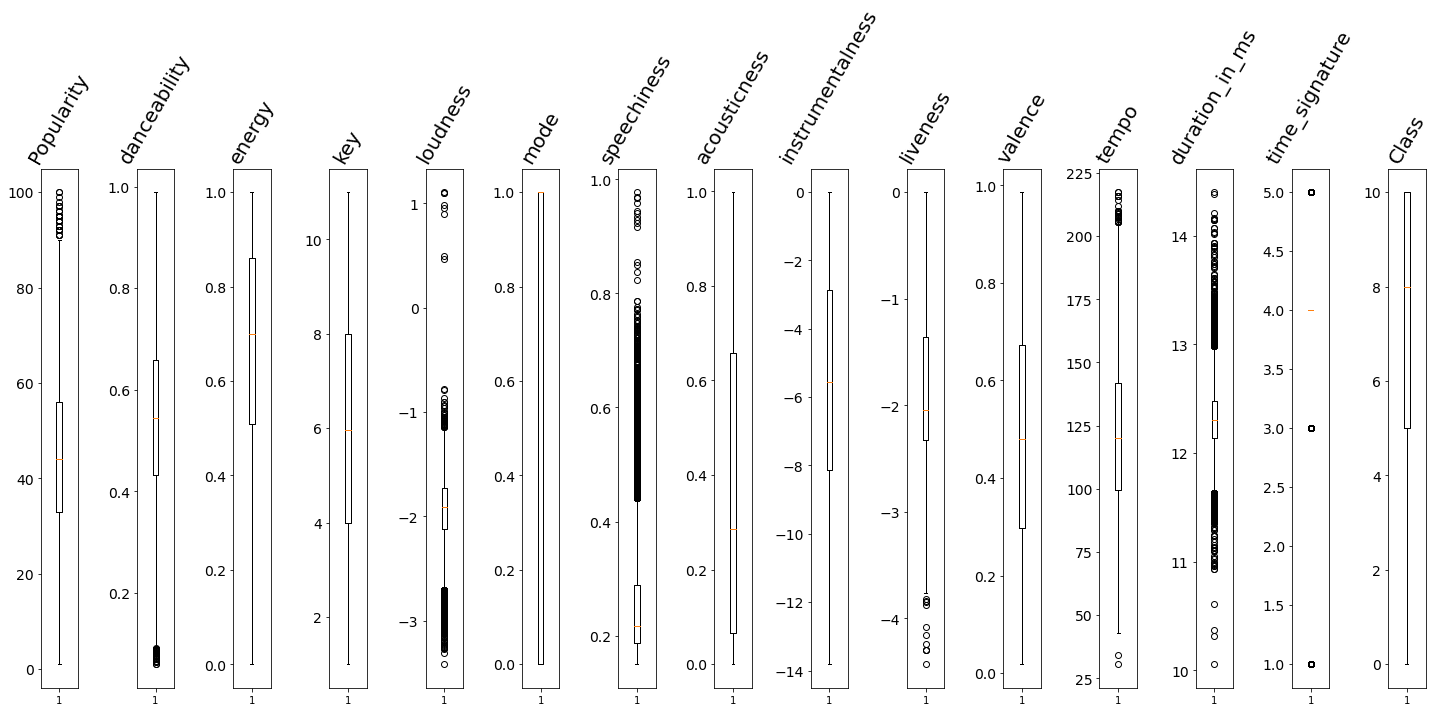

In [92]:
df_box = df.select_dtypes([int,float])
fig, axs = plt.subplots(1, len(df_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_box.iloc[:,i])
    ax.set_title(df_box.columns[i], fontsize=20, rotation=60)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()


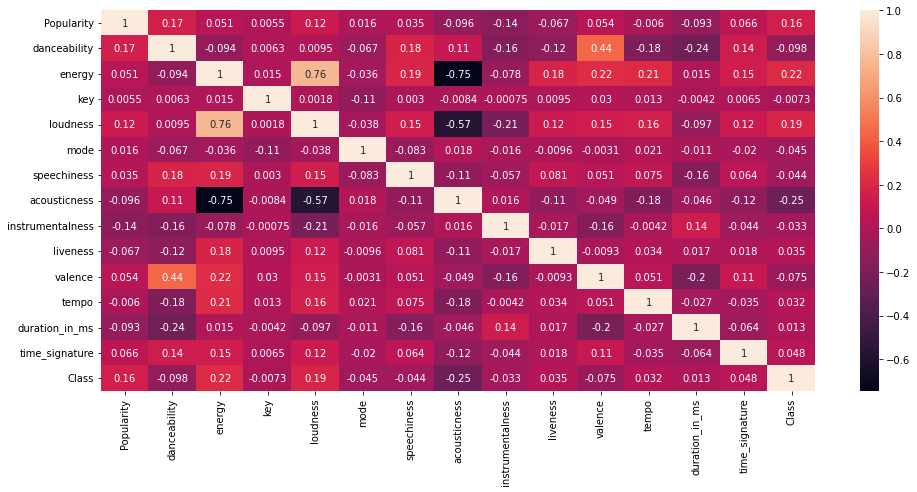

In [93]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

#### It seems that there is no strong correlations between the target variable and the features 

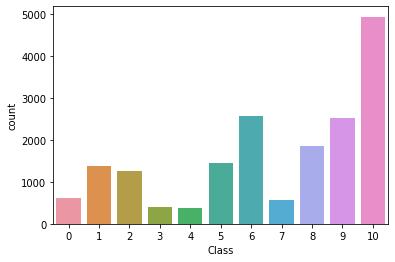

In [94]:
# Number of classes
sns.countplot(data = df, x= df["Class"])
plt.show()

### Categorical data encoding

In [96]:
columns = ["Artist Name","Track Name"]
enc = LabelEncoder()
for col in columns:
    df[col] = enc.fit_transform(df[col])

In [95]:
df[["Artist Name","Track Name"]]

,Artist Name,Track Name
0,Bruno Mars,That's What I Like (feat. Gucci Mane)
1,Boston,Hitch a Ride
2,The Raincoats,No Side to Fall In
3,Deno,Lingo (feat. J.I & Chunkz)
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered
...,...,...
17991,Green-House,Find Home
17992,Micatone,All Gone
17993,Smash Hit Combo,Peine perdue
17994,Beherit,Salomon's Gate


# feature engineering

In [97]:
# Dropping columns we don't need 
df.drop(['Artist Name','Track Name'],axis=1 ,inplace = True)


In [98]:
# from sklearn.preprocessing import StandardScaler

# # Center and scale (i.e., standardize) all numeric features excepte Class column 
# Y=df['Class']
# df=df.drop(['Class'] , axis=1)

# scaler = StandardScaler()
# scaler.fit(df)

# df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
 
 
# df['Class']=Y
# df

## Building the model using autoML

### Data splitting

In [99]:
x_train = df.drop('Class' ,axis = 1)
y_train = df['Class']

In [100]:
test_data = test.fillna(0)

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 11)


In [102]:
X_train.shape, y_train.shape

((14394, 14), (14394,))

In [103]:
X_val.shape, y_val.shape

((3599, 14), (3599,))

In [104]:
pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.metrics import *
import sklearn
from pprint import pprint
import autosklearn
import autosklearn.classification
import inspect
from autosklearn.pipeline.components.classification import ClassifierChoice
from sklearn.preprocessing import LabelEncoder

In [106]:
inspect.signature(autosklearn.classification.AutoSklearnClassifier)


<Signature (time_left_for_this_task=3600, per_run_time_limit=None, initial_configurations_via_metalearning=25, ensemble_size: int = 50, ensemble_nbest=50, max_models_on_disc=50, seed=1, memory_limit=3072, include: Union[Dict[str, List[str]], NoneType] = None, exclude: Union[Dict[str, List[str]], NoneType] = None, resampling_strategy='holdout', resampling_strategy_arguments=None, tmp_folder=None, delete_tmp_folder_after_terminate=True, n_jobs: Union[int, NoneType] = None, dask_client: Union[distributed.client.Client, NoneType] = None, disable_evaluator_output=False, get_smac_object_callback=None, smac_scenario_args=None, logging_config=None, metadata_directory=None, metric=None, scoring_functions: Union[List[autosklearn.metrics.Scorer], NoneType] = None, load_models: bool = True, get_trials_callback=None)>

In [107]:
for name in ClassifierChoice.get_components():
    print(name)

adaboost
bernoulli_nb
decision_tree
extra_trees
gaussian_nb
gradient_boosting
k_nearest_neighbors
lda
liblinear_svc
libsvm_svc
mlp
multinomial_nb
passive_aggressive
qda
random_forest
sgd


In [108]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600, per_run_time_limit=70)

In [109]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(per_run_time_limit=70, time_left_for_this_task=600)

In [110]:
pprint(automl.show_models(), indent=4)


{   10: {   'balancing': Balancing(random_state=1, strategy='weighting'),
            'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fd554590ed0>,
            'cost': 0.8922332140601978,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fd55476d610>,
            'ensemble_weight': 0.58,
            'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fd55475d310>,
            'model_id': 10,
            'rank': 5,
            'sklearn_classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.0285269469336831, n_estimators=105,
                   random_state=1)},
    11: {   'balancing': Balancing(random_state=1),
            'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fd554823710>,
            'cost'

In [111]:
print(automl.leaderboard())

          rank  ensemble_weight                type      cost   duration
model_id                                                                
20           1             0.16   gradient_boosting  0.511471  29.249570
18           2             0.04   gradient_boosting  0.530415  15.372046
11           3             0.06                 mlp  0.544517  12.184155
22           4             0.16  passive_aggressive  0.589139   5.361558
10           5             0.58            adaboost  0.892233   9.206245


In [112]:
y_hat = automl.predict(X_val)
print("Accuracy score", sklearn.metrics.accuracy_score(y_val, y_hat))
print(automl.sprint_statistics())

Accuracy score 0.4929146985273687
auto-sklearn results:
  Dataset name: d2097022-1803-11ed-80d8-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.488529
  Number of target algorithm runs: 25
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 9



In [113]:
cv_results = pd.DataFrame.from_dict(automl.cv_results_)
cv_results

,mean_test_score,mean_fit_time,params,rank_test_scores,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.000000,6.449956,"{'balancing:strategy': 'none', 'classifier:__c...",13,Memout,0.0,none,random_forest,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.450852,64.294423,"{'balancing:strategy': 'weighting', 'classifie...",4,Success,0.0,weighting,gradient_boosting,feature_type,feature_agglomeration,...,0.766357,0.255619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.292991,32.939969,"{'balancing:strategy': 'weighting', 'classifie...",8,Success,0.0,weighting,libsvm_svc,feature_type,select_rates_classification,...,0.759067,0.238219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fdr
3,0.000000,1.320707,"{'balancing:strategy': 'none', 'classifier:__c...",13,Memout,0.0,none,lda,feature_type,kitchen_sinks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,70.052574,"{'balancing:strategy': 'weighting', 'classifie...",13,Timeout,0.0,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,70.038171,"{'balancing:strategy': 'weighting', 'classifie...",13,Timeout,0.0,weighting,gradient_boosting,feature_type,select_rates_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fpr
6,0.000000,1.351493,"{'balancing:strategy': 'none', 'classifier:__c...",13,Memout,0.0,none,gradient_boosting,feature_type,polynomial,...,0.967364,0.204455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.236371,43.925081,"{'balancing:strategy': 'weighting', 'classifie...",10,Success,0.0,weighting,libsvm_svc,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.107767,9.206245,"{'balancing:strategy': 'weighting', 'classifie...",12,Success,0.0,weighting,adaboost,feature_type,fast_ica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.455483,12.184155,"{'balancing:strategy': 'none', 'classifier:__c...",3,Success,0.0,none,mlp,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Traditional ML
### Fitting using default parameters

In [116]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.4459572103362045


In [117]:
from sklearn.svm import SVC
clf = SVC()

clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.2836899138649625


In [118]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.43706585162545153


In [124]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.4090025006946374


In [125]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.43734370658516253


In [145]:
# the highest
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.4901361489302584


In [115]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_val, y_val))

0.21700472353431507


### Looking for the best K value for KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
K = np.arange(2, 21)

training_score = []
validation_score = []

for i in K:
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train)
    training_score.append(knn.score(X_train, y_train))
    validation_score.append(knn.score(X_val, y_val))


In [132]:
hyper_params_knn = pd.DataFrame({'No of Neighbors' : K, 'Training Score' : np.array(training_score), 'Validation Score' : np.array(validation_score)}, columns = ['No of Neighbors', 'Training Score', 'Validation Score'])
hyper_params_knn[(hyper_params_knn['Validation Score'] == hyper_params_knn['Validation Score'].max())]


,No of Neighbors,Training Score,Validation Score
18,20,0.360706,0.272854


In [133]:
knn_best_params = hyper_params_knn[(hyper_params_knn['Validation Score'] == hyper_params_knn['Validation Score'].max())]
knn_best_params

,No of Neighbors,Training Score,Validation Score
18,20,0.360706,0.272854


In [134]:
knn_model = KNeighborsClassifier(n_neighbors = knn_best_params['No of Neighbors'].values[0])
knn_model.fit(X_train, y_train)
knn_model.score(X_val, y_val)

0.27285357043623226

## Gradient Boosting Grid search

In [127]:
# hyperparameter Tuning
from sklearn.experimental import enable_hist_gradient_boosting

hgbc = GradientBoostingClassifier()
parameters = {
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(hgbc,parameters,cv=5)
clf.fit(X_train, y_train.values.ravel())

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

In [ ]:
# apply classifier with best parameters

clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=3)
clf.fit(X_train, y_train.values.ravel())

### RandomForest Random search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state = 1)

parameters = {"n_estimators" : [100, 300, 500, 800, 1200],
              "max_depth" : [5, 8, 10, 15, 25, 30],
              "min_samples_split" : [2,5,10,15, 100],
              "min_samples_leaf" : [1,2,5,10]
              }

gridF = RandomizedSearchCV(clf, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_val, y_val))
print(bestF.best_params_)

### Save results

In [ ]:
# save results into csv